In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SDO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.DataFrame({'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


# set_index() method allows one or more column values become the row index.

In [3]:
data = {
  "name": ["Sally", "Mary", "John", "Monica"],
  "age": [50, 40, 30, 40],
  "qualified": [True, False, False, False]
}

df = pd.DataFrame(data)
df

# newdf = df.set_index('name')
# newdf

,name,age,qualified
0,Sally,50,True
1,Mary,40,False
2,John,30,False
3,Monica,40,False


In [6]:
data = {
  "name": ["Sally", "Mary", "John", "Monica"],
  "age": [50, 40, 30, 40],
  "qualified": [True, False, False, False]
}

df = pd.DataFrame(data)
df

newdf = df.set_index('name')
newdf

,age,qualified
name,,
Sally,50,True
Mary,40,False
John,30,False
Monica,40,False


# Canvas Assignment

In [8]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


# 1) numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put and make the column an integer column
(instead of a float column).

In [7]:
df['FlightNumber'] = df['FlightNumber'].interpolate()
df['FlightNumber']

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

# 2) The From_To column would be  Split each string on the underscore delimiter _ 

In [24]:
temporary_df = df['From_To'].str.split('_',expand = True)
temporary_df

#.split() is not a method directly available for DataFrame columns.
#By using .str, you are accessing the string accessor for the column
# Without using .str, pandas would not recognize the split() method as it's a string operation

,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [25]:
temporary_df.columns = ['From','To']
temporary_df


,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


# 3) Standardise the strings so that only the first letter is uppercase 

In [11]:
# Standardizing capitalization of city names
temporary_df['From'] = temporary_df['From'].str.capitalize()
temporary_df['To'] = temporary_df['To'].str.capitalize()

print(temporary_df)


       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London


In [13]:
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


In [12]:
df.drop(columns=['From_To'],inplace = True)
df=pd.concat([temporary_df,df],axis = 1)
print(df)

       From         To  FlightNumber  RecentDelays              Airline
0    London      Paris         10045      [23, 47]               KLM(!)
1    Madrid      Milan         10055            []    <Air France> (12)
2    London  Stockholm         10065  [24, 43, 87]  (British Airways. )
3  Budapest      Paris         10075          [13]       12. Air France
4  Brussels     London         10085      [67, 32]          "Swiss Air"


In [17]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [19]:
df['FlightNumber'] = df['FlightNumber'].interpolate()
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [21]:
temp_df = df['From_To'].str.split('_',expand = True)


,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [27]:
temp_df.columns = ['From','To']
temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [33]:
temp_df['From'] = temp_df['From'].str.capitalize()
temp_df['To'] = temp_df['To'].str.capitalize()
print(temp_df)

       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London


In [37]:
df.drop(columns = ['From_To'],inplace = True)
df

KeyError: "['From_To'] not found in axis"

In [34]:
merge = df.concat(df,temp_df,ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [ ]:
import pandas as pd

# Creating a DataFrame from a dictionary
data = {'Name': ['John', 'Jane', 'Bob', 'Alice'],
        'Age': [25, 30, 22, 28],
        'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago']}


df

In [ ]:
print(df.describe())


In [1]:
import pandas as pd
df = pd.read_excel(r'C:\Users\SDO\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\DD 5TH FC REPORT 08.02.24.xlsx',sheet_name ='GMP')
df.head

C:\Users\SDO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<bound method NDFrame.head of    5TH SFC NIT STATUS FOR FY 2023-24     Unnamed: 1              Unnamed: 2  \
0                             SL No.  Name of Block  Name of Gram Panchayat   
1                                NaN      BANSIHARI          BRAJABALLAVPUR   
2                                NaN      BANSIHARI               ELLAHABAD   
3                                NaN      BANSIHARI                GANGURIA   
4                                NaN      BANSIHARI                MAHABARI   
5                                NaN      KUSHMANDI                   AKCHA   
6                                NaN      KUSHMANDI                  BEROIL   
7                                NaN      KUSHMANDI                    DEUL   
8                                NaN      KUSHMANDI              KALIKAMORA   
9                                NaN      KUSHMANDI                 KARANJI   
10                               NaN      KUSHMANDI               KUSHMANDI   
11                    

In [ ]:
import pandas as pd

In [4]:
import pandas as pd

file_path = r'C:\Users\SDO\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\DD 5TH FC REPORT 08.02.24.xlsx'
df = pd.read_excel(file_path, sheet_name='GMP', header=None)

# Display the first few rows of the DataFrame
print(df.iloc[:,:2].head())


                                   0              1
0  5TH SFC NIT STATUS FOR FY 2023-24            NaN
1                             SL No.  Name of Block
2                                NaN      BANSIHARI
3                                NaN      BANSIHARI
4                                NaN      BANSIHARI


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df

In [ ]:
pip install --upgrade openpyxl


In [ ]:
pip show openpyxl


In [ ]:
df.dtype

In [ ]:
pip uninstall pandas


In [ ]:
def fibonacci_no():
    
    a,b = 0,1
    while True:
        yield a
        a, b = b, a + b

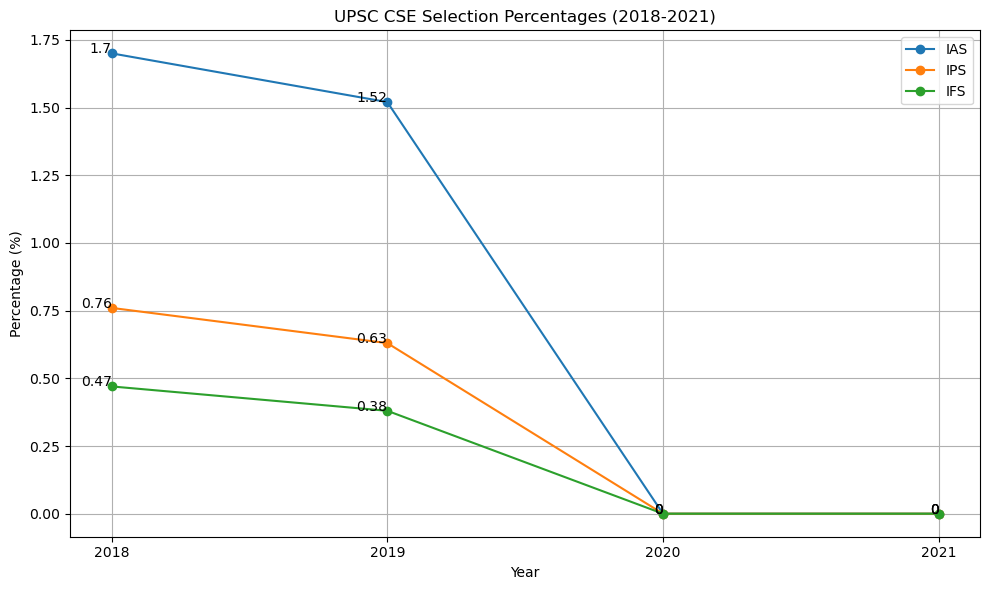

In [14]:
import matplotlib.pyplot as plt

# Data
years = ['2018', '2019', '2020', '2021']
ias_percentages = [1.7, 1.52, 0, 0]  # Fill in estimated data for 2020 and 2021
ips_percentages = [0.76, 0.63, 0, 0]
ifs_percentages = [0.47, 0.38, 0, 0]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(years, ias_percentages, marker='o', label='IAS')
plt.plot(years, ips_percentages, marker='o', label='IPS')
plt.plot(years, ifs_percentages, marker='o', label='IFS')

plt.title('UPSC CSE Selection Percentages (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.legend()

# Annotate values
for i in range(len(years)):
    plt.text(years[i], ias_percentages[i], str(ias_percentages[i]), ha='right')
    plt.text(years[i], ips_percentages[i], str(ips_percentages[i]), ha='right')
    plt.text(years[i], ifs_percentages[i], str(ifs_percentages[i]), ha='right')

plt.tight_layout()
plt.show()


In [9]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [12]:
temp_df = df['From_To'].str.split('_',expand = True)
temp_df

,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [16]:
temp_df[0].capitalize()

AttributeError: 'Series' object has no attribute 'capitalize'

In [ ]:
i=0
while (i<10):
    print(i)
    i = i+1

In [ ]:
l=[1,2,3,4,5,5,6,7]
for i in l:
    print(i)
   